# Time series visualizer

## Import libraries/packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Import data (Make sure to parse dates. Consider setting index column to 'date'.)

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col = 'date', parse_dates=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


## Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [4]:
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) &
           (df['value'] <= df['value'].quantile(0.975))]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1238 non-null   int64
dtypes: int64(1)
memory usage: 19.3 KB


## Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

Text(0.5, 1.0, 'Daily FreeCodeCamp Forum Page Views 5/2016 - 12/2019')

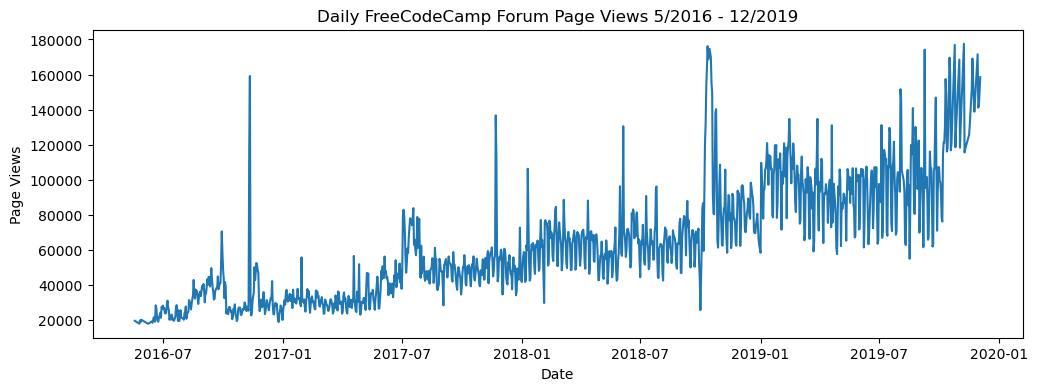

In [6]:
fig, ax = plt.subplots(figsize=(12,4))

ax = sns.lineplot(data=df, x='date', y='value')

ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

## Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [7]:
df_bar = df.copy()

In [8]:
df_bar['month'] = pd.DatetimeIndex(df_bar.index).month
df_bar['year'] = pd.DatetimeIndex(df_bar.index).year

In [9]:
df_bar.head()

,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016


In [10]:
df_bar = df_bar.groupby(['year', 'month'])['value'].mean()
df_bar.head()

year  month
2016  5        19432.400000
      6        21875.105263
      7        24109.678571
      8        31049.193548
      9        41476.866667
Name: value, dtype: float64

In [11]:
df_bar = df_bar.unstack()

In [12]:
df_bar.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


In [13]:
df_bar.columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
    'November', 'December']

In [14]:
df_bar

,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


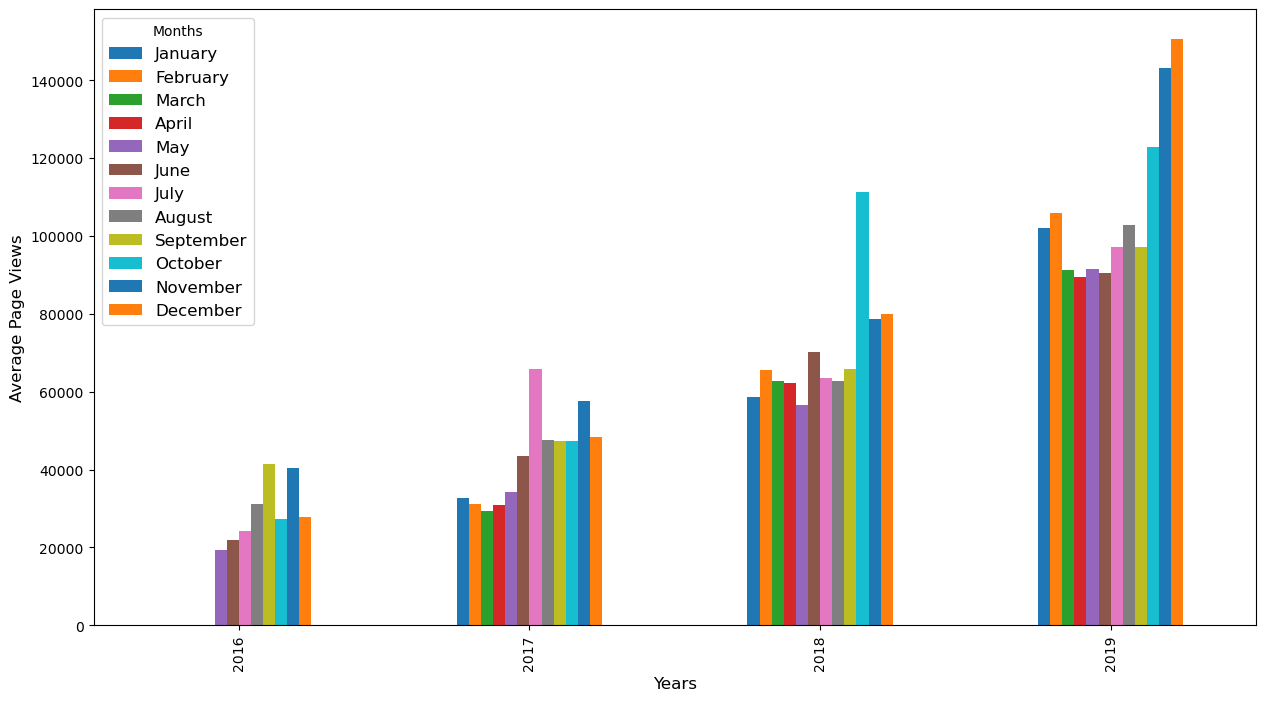

In [15]:
fig = df_bar.plot(kind='bar', figsize = (15,8)).figure
plt.title('')
plt.xlabel('Years', fontsize=12)
plt.ylabel('Average Page Views', fontsize=12)
plt.legend(loc='upper left', title='Months', fontsize=12)

## Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [16]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


In [17]:
df_box.sort_values(by=['year','date'],ascending=[False,True],inplace=True)

In [18]:
df_box

,date,value,year,month
932,2019-01-01,58508,2019,Jan
933,2019-01-02,109708,2019,Jan
934,2019-01-03,100710,2019,Jan
935,2019-01-04,94514,2019,Jan
936,2019-01-05,77897,2019,Jan
...,...,...,...,...
200,2016-12-27,25138,2016,Dec
201,2016-12-28,28424,2016,Dec
202,2016-12-29,27197,2016,Dec
203,2016-12-30,24804,2016,Dec


Text(0, 0.5, 'Page Views')

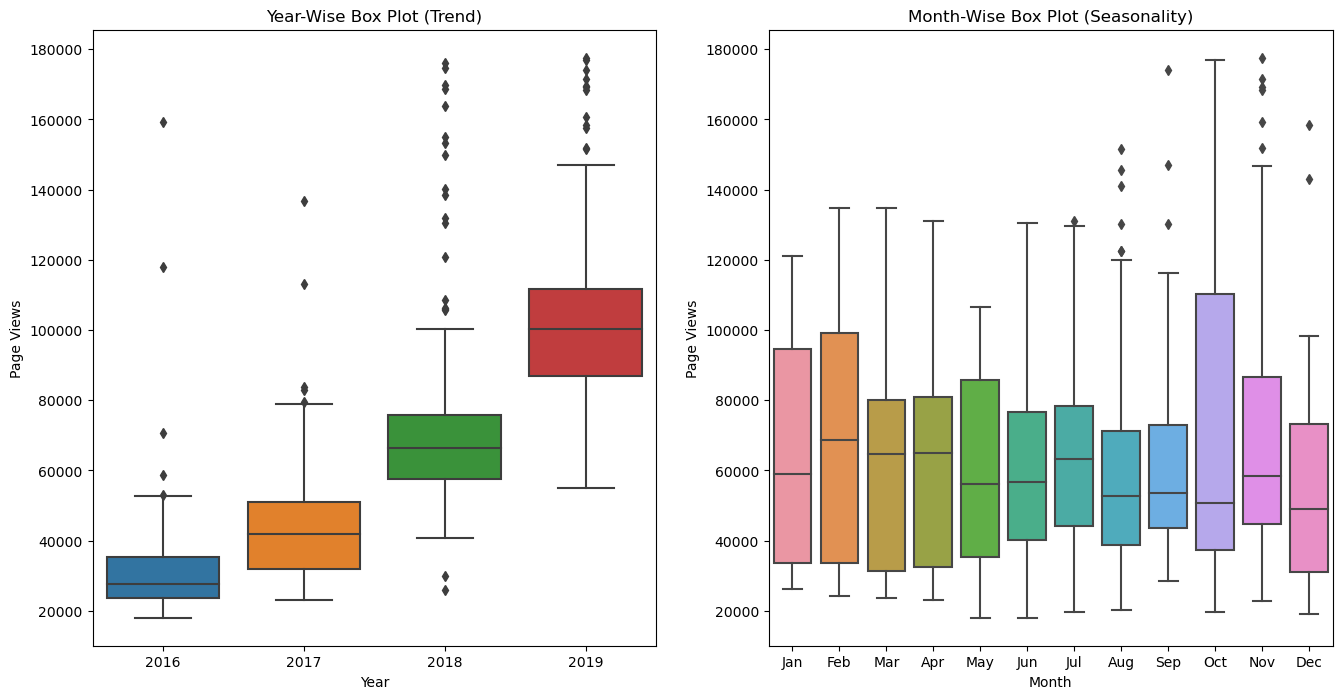

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
sns.boxplot(ax=ax1, x='year', y='value', data = df_box)
ax1.set_title("Year-wise Box Plot (Trend)")
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')



sns.boxplot(ax=ax2, x='month', y='value', data = df_box)
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')